In [5]:
# Import necessary modules
import data.csv as csv
import preprocessing.filtering as filter
import analysis.power_spectrum as ps
import visualization.plot_power_spectrum as ps
import visualization.welch_power_spectrum as wps
import visualization.plot_time_series as ts
import visualization.plot_topomap as topomap
import utils.data as ud

sfreq = 200 # Hz
lowcut = 1 # Hz
highcut = 50 # Hz
order = 4
freqs = [60, 120] # Hz
q = 30

In [6]:
# Load sample data
data = csv.read_csv_eeg('data/eeg_data/sample_data.csv')
data.head()

the file path is
data/eeg_data/sample_data.csv


,sec,EEG,alpha,beta,delta,theta
0,2.440,-9.51538,-0.458429,-0.300244,-8.22506,0.938709
1,2.445,-8.83179,-0.477408,-0.096552,-7.79171,0.806110
2,2.450,-7.40356,-0.456316,0.177482,-7.35087,0.663650
3,2.455,-7.04956,-0.390345,0.317293,-6.90547,0.517710
4,2.460,-7.83081,-0.279366,0.224235,-6.45845,0.374589


1
7141


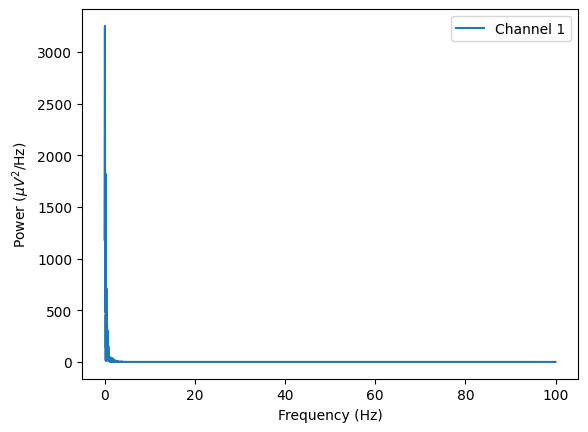

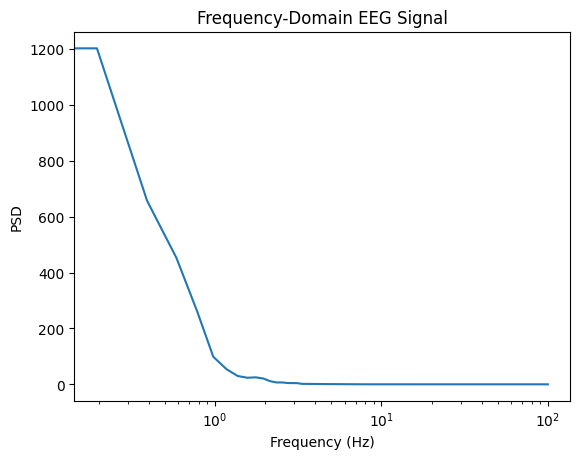

In [9]:

# Filter the data
filtered_data = filter.butter_bandpass_filter(data['EEG'], lowcut, highcut, sfreq, order) # 8-12 Hz bandpass filter
notched_data = filter.notch_filter(data, sfreq, freqs, q) # 60 Hz notch filter

# Compute power spectrum
ps.plot_power_spectrum(ud.get_columns(data, ['EEG']).to_numpy().T,sfreq)

wps.welch_power_spectrum(data,200)
# Visualize power spectrum map
#topomap.plot_topomap(filtered_data, show=True) cannot visualize as we dont have positional information
# ts.plot_time_series(data, sfreq)

